In [70]:
%matplotlib widget
from pathlib import Path

import numpy as np
import scipy.signal as sps

from spectrometer import FID1D, process
from spectrometer.process import decaying_sinus

cm = 1 / 2.54

In [71]:
# Load raw *.fid data
file = Path(
    "../data/20230910-100255-none-none-sample_signal_25MHz_10mVpp_56dB_attenuator,df=1ppm,record_length=10000.0,sample_rate=320000.0.fid"
)
fid = FID1D.from_file(file)

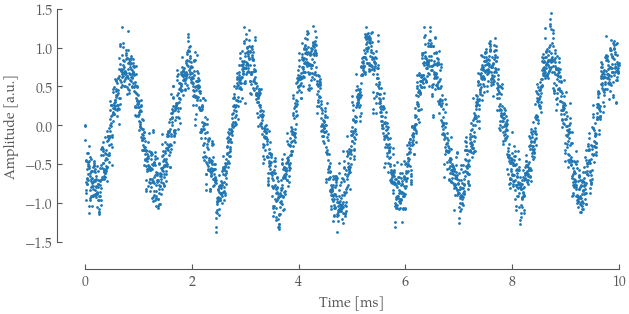

In [72]:
# Plot raw data
fig = fid.plot(
    figsize=(16.0 * cm, 8.0 * cm)  # Wide Layout: ~16cm, Margin Layout: 10.7cm
)
fig.savefig("test_signal_raw.pdf")

Amplitude: -0.8122892972444441
Frequency: 0.8818016544265501
Phase: 0.4030437616494248
Offset: -0.004531110246258242
Lambda: -0.007113761042952031


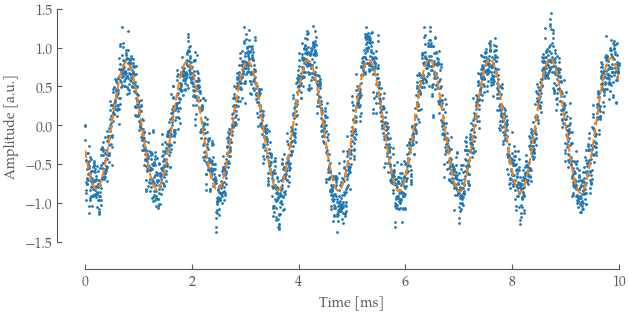

In [73]:
# Try to plot simple least squares fit for a decaying sinusoid
decaying_sinus_fit = decaying_sinus.fit(fid.ms_scale, fid.real)
ms_scale_fine = np.linspace(fid.ms_scale[0], fid.ms_scale[-1], len(fid.ms_scale) * 10)
print(decaying_sinus_fit)

# Plot raw
fig = fid.plot(figsize=(16 * cm, 8 * cm))  # Wide Layout: ~16cm, Margin Layout: 10.7cm

# Plot fit
fig.axes[0].plot(
    ms_scale_fine,
    decaying_sinus_fit(ms_scale_fine),
    linestyle="--",
)

fig.savefig("test_signal_fit.pdf")

Phase Shift: 117
Peak location: -898.437500000001 Hz
Peak height: 2141.46337890625


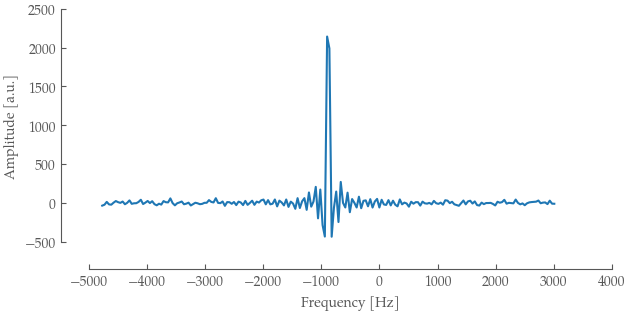

In [79]:
# Spectrum
spectrum, p0 = fid.spectrum(phase_shift_kwargs={"p0": 117})
print(f"Phase Shift: {p0}")

peak_spectrum = spectrum.crop_around(spectrum.max_peak, 200)
peak_fig = peak_spectrum.hz.plot(figsize=(16 * cm, 8 * cm), linestyle="-", marker="")

peak_fig.savefig("test_signal_fft.pdf")
print(f"Peak location: {spectrum.hz.max_peak} Hz")
print(f"Peak height: {peak_spectrum[peak_spectrum.max_peak].real}")